In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.contingency import expected_freq
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
%matplotlib inline

# Вариант 5

## Выполните следующие задания:

Обработайте статистические данные 100 независимых измерений некоторой физической величины Х.

1) Составьте статистическое распределение частот выборки Х.

2) Найдите эмпирическую функцию распределения и постройте ее график.

3) Постройте полигон и гистограмму относительных частот.

4) Вычислите числовые характеристики:

• выборочную среднюю;

• выборочную дисперсию;

• выборочное среднее квадратическое отклонение;

• коэффициенты эксцесса и ассиметрии.

5) Выдвинув гипотезу о нормальном распределении, проверьте ее критерием согласия Пирсона при уровне значимости а = 0.05.

6) Найдите точечные и интервальные оценки параметров распределения (доверительную вероятность принять равной 0.95).

7) Сделать регрессионный анализ

8) Дисперсионный анализ

In [2]:
data=pd.read_csv('dataset.csv')
data.describe()

,X,Y
count,100.000000,100.00000
mean,169.190000,64.08000
std,6.472467,6.80861
min,154.000000,51.00000
25%,164.000000,59.00000
50%,169.000000,63.00000
75%,173.000000,69.00000
max,190.000000,80.00000


## Построим гистограмму распределения. 
Это нужно для общего представления о наших данных.
Для этого воспользуемся функцией hist с выборкой по параметру Х из таблицы. Вывод гистограммы осуществляется с помощью функции show().

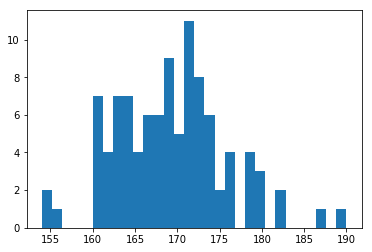

In [3]:
plt.hist(data['X'],30)
plt.show()

# Статистическое распределение частот выборки

Для того, чтобы построить статистическое распределение частот выборки, необходимо сначала определить следующие параметры: 
## Максимальное значение:

In [4]:
X_max=max(data['X'])
print(X_max)

190


## Минимальное значение:

In [5]:
X_min=min(data['X'])
print(X_min)

154


## Разница между минимумом и максимумом:

In [6]:
R=X_max-X_min
print(R)

36


Теперь разобьем выборку на интервальные отрезки. Во многих источниках для определения “оптимального” числа интервалов можно найти упоминание эвристической формулы Старджесса: $$k=3,31*lgn+1$$ Воспользуемся данной формулой.
## Число интервалов:

In [7]:
K=float(round(1.0+3.32*np.log10(100)))
print(K)

8.0


Зная разницу наибольшего и наименьшего элемента выборки, а также число интервалов, мы можем найти шаг, с помощью которого задаются значения интервалов. Шаг находим по формуле: $$h=\frac{R}{k}$$
## Шаг:

In [8]:
H=float(R/K)
print(H)

4.5


Теперь, зная все нужные параметры, можно рассчитать частоты по интервалам.

In [9]:
def intervals_cumsum(x_min,step,size):
    start=x_min
    a=[]
    b=[]
    for i in range(size):
        a.append(start)
        start+=step
        b.append(start)
    return a,b

def count_values(data,element):
    count=0;counts=[]
    for item in data['X']:
        if item<=element:
            count+=1
    return count
   
def counter_in(data,b):
    delta=[];f=0
    for index in range(len(b)):
        first=count_values(data,b[index])-f
        delta.append(first)
        f+=first
    return delta
  
        
def frequences(ni,n):
    freq=[]
    for item in ni:
        freq.append(item/n)
    return freq
        
a,b=intervals_cumsum(X_min,H,int(K))
ni=counter_in(data,b)
freq=frequences(ni,100.0)
print('Частоты по интервалам:')
print(freq)

Частоты по интервалам:
[0.03, 0.18, 0.17, 0.35, 0.16, 0.07, 0.02, 0.02]


Чтобы проверить правильность рассчетов, можно вывести сумму посчитанных частот и убедиться, что сумма равна 1:

In [10]:
print('Сумма частот:')
print(round(sum(freq)))

Сумма частот:
1.0


# Построим полигон и гистограмму посчитанных частот
Чтобы построить полигон, воспользуемся функцией plot(). Зададим ось х отрезком от 0 до 25 с шагом 8:

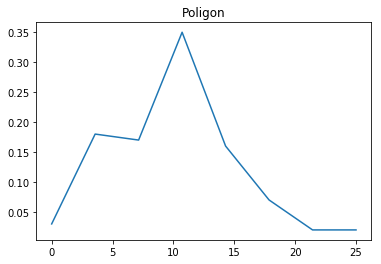

In [11]:
x=np.linspace(0,25,8)
plt.plot(x,freq)
plt.title('Poligon')
plt.show()

Построим гистограмму, используя функцию hist(), которой уже пользовались ранее:

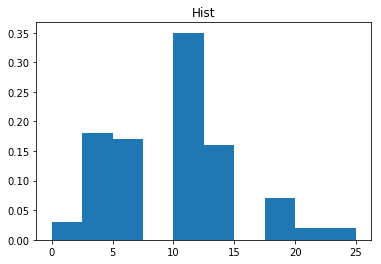

In [12]:
plt.hist(x,10,weights=freq)
plt.title('Hist')
plt.show()

# Эмпирическая функция распределения

С помощью модуля distributions библиотеки statsmodels построим график функции распределения. Начальное значение оси Х - минимальный элемент выборки, последнее значение - максимальный элемент. 

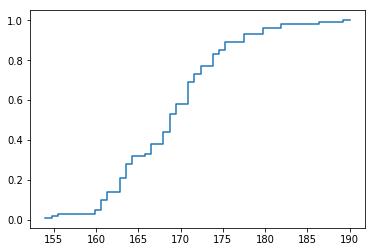

In [13]:
graph = sm.distributions.ECDF(data['X'])
x = np.linspace(min(data['X']), max(data['X']))
y = graph(x)
plt.step(x, y)
plt.show()

# Вычисление числовых характеристик

## Мода выборки
Мода выборки вычисляется с помощью модуля stats библиотеки scipy. В качестве входных данных используется столбец Х. 

Модой распределения называется такая величина изучаемого признака, которая в данной совокупности встречается наиболее часто, т.е. один из вариантов признака повторяется чаще, чем все другие.

In [14]:
print("Мода выборки:")

print(stats.mode(data['X']))

Мода выборки:
ModeResult(mode=array([171]), count=array([11]))


## Медиана
Медиана вычисляется с помощью функции median() библиотеки numpy. 

Медиана - это значение признака, приходящееся на середину ряда, расположенного в порядке возрастания или убывания числовых значений признака.

In [15]:
print("Медиана:")

print(np.median(data['X']))

Медиана:
169.0


## Среднее значение
Среднее значение вычисляется с помощью функции mean() библиотеки numpy. 

In [16]:
print("Среднее значение:")

print(np.mean(data['X']))

Среднее значение:
169.19


## Дисперсия
Дисперсия вычисляется с помощью функции var() библиотеки numpy.

Если матожидание отражает центр случайной величины, то дисперсия дает характеристику разброса данных вокруг центра. То есть дисперсия - это математическое ожидание отклонений от математического ожидания.

In [17]:
print("Дисперсия:")

print(np.var(data['X']))

Дисперсия:
41.4739


## Среднее квадратичное отклонение
Среднее квадратичное отклонение вычисляется с помощью функции std() библиотеки numpy. 

Среднеквадратичное отклонение, очевидно, также характеризует меру рассеяния данных, но теперь (в отличие от дисперсии) его можно сравнивать с исходными данными, так как единицы измерения у них одинаковые. 

In [18]:
print("Среднее квадратичное отклонение:")

print(np.std(data['X']))

Среднее квадратичное отклонение:
6.440023291883345


## Коэффициент вариации
Среднее квадратическое отклонение дает абсолютную оценку меры разброса. Поэтому чтобы понять, насколько разброс велик относительно самих значений, требуется относительный показатель. Такой показатель называется коэффициентом вариации.

In [19]:
print("Коэффициент вариации:")

print(stats.variation(data['X']))

Коэффициент вариации:
0.03806385301662832


## Коэффициенты эксцесса и асимметрии
Коэффициенты эксцесса и асимметрии вычисляются с помощью функций модуля stats библиотеки scipy.


Коэффициент эксцесса $\gamma_1$ — мера остроты пика по сравнению с нормальным распределением: $\gamma_1=0$ в случае так называемого нормального эксцесса (в силу того, что у нормального распределения тоже $\gamma_1=0$), $\gamma_1<0$ в случае дефекта (т.н. отрицательный эксцесс, когда в окрестности моды более низкая и плоская вершина, чем у нормального распределения), $\gamma_1>0$ в случае эксцесса (т.н. положительный эксцесс, когда в окрестности моды более острый и высокий пик, чем у нормального распределения).

Коэффициент асимметрии $\gamma_2$ — мера асимметричности: $\gamma_2=0$ в случае симметричности распределения относительно мат.ожидания, $\gamma_2<0$ в случае левой асимметрии (отн. мат.ожидания левый хвост длиннее правого),  $\gamma_2>0$ в случае правой асимметрии (отн. мат.ожидания правый хвост длиннее левого).

In [20]:
print("\nКоэффициент эксцесса:")

print(stats.kurtosis(data['X']))

print("\nКоэффициент асимметрии:")

print(stats.skew(data['X']))


Коэффициент эксцесса:
0.550390447749

Коэффициент асимметрии:
0.397625789211


## Нормальность распределения
Выполним проверку на нормальность распределения с помощью критерия Колмогорова. Для проверки используем встроенную функцию kstest() модуля stats.

Классический критерий Колмогорова (иногда говорят Колмогорова-Смирнова) предназначен для проверки простых гипотез о принадлежности анализируемой выборки некоторому полностью известному закону распределения. Данный критерий похож на критерий Пирсона, только анализируется разность между функцией распределения предполагаемого распределения и имеющегося распределения данных измерений.

In [21]:
print("Нормальность распределения (Критерий Колмогорова):")

print(stats.kstest(data['X'], 'norm'))

Нормальность распределения (Критерий Колмогорова):
KstestResult(statistic=1.0, pvalue=0.0)


# Точечные и интервальные оценки параметров распределения

Оценки неизвестных параметров бывают двух видов – точечные и интервальные . 
Точечная оценка - оценка имеющая конкретное числовое значение. Например, среднее арифметическое: $$\frac{(x1+x2+...+xn)}{n}$$ где: x1,x2,...xn - выборочные значения; n - объем выборки.

Интервальная оценка - оценка представляемая интервалом значений, внутри которого с задаваемой исследователем вероятностью 1- α находится истинное значение оцениваемого параметра. Интервал в интервальной оценке называется доверительным интервалом, задаваемая исследователем вероятность, 1- α, называется доверительной вероятностью. В практике статистических вычислений применяются стандартные значения доверительной вероятности: 0,95, 0,98 и 0,99 (95%, 98% и 99% соответственно).

In [22]:
T_coef=1.98

def get_mean_intervals(a,b): ##получаем средние значения интервалов
    means=[]
    for i in range(len(a)):
        means.append((a[i]+b[i])/2)
    return means

def mean_mult_freq(means,freq): ##умножаем полученные значения на значения частов этих интервалов
    m=[]
    for i in range(len(means)):
        m.append(means[i]*freq[i])
    return m

def get_d(means): ##вычисляем сумму значений, полученных на предыдущем шаге, затем из каждого элемента вычитаем эту сумму
    data=[]
    for item in means:
        data.append(round(item-sum(mean_mult_freq(means,freq)),2))
    return data

def get_d2(d,freq): ##умножаем квадрат полученных значений на соответствующие им частоты
    data=[]
    for i in range(len(d)):
        data.append(round(d[i]**2*freq[i],2))
    return data

means=get_mean_intervals(a,b) 

d=get_d(means)
d=get_d2(d,freq)

S=np.sqrt(sum(d)*100/99) ##получаем несмещенное значение
yolo=T_coef*S/np.sqrt(len(data['X'])) ##вычисляем значение для разброса интервальной оценки
xmax=round(np.mean(data['X'])+yolo,2) ##рассчитываем нижнюю и верхнюю границу интервала
xmin=round(np.mean(data['X'])-yolo,2)

Интервальная оценка:

In [23]:
print(str(xmin)+' < a < '+str(xmax))

167.9 < a < 170.48


Воспользуемся критерием Пирсона для получения точечной оценки. Результатом выполнения функции pearsonr() модуля stats являются 2 числа, показывающие, насколько близко наше распределение к нормальному. 

In [24]:
coef_corr=stats.pearsonr(data['X'],data['Y'])
print(coef_corr)

(0.6978299811232923, 7.147254325453498e-16)


Если результат выполнения функции - (0, 0), это значит, что значения Х и Y - независимы. В нашем случае ситуация обратная, поэтому можно сделать вывод о зависимости параметров и нормальном распределении выборки.

# Регрессионный анализ

Для работы с регрессионным анализом воспользуемся модулем LinearRegression библиотеки sklearn. Функция fit() принимает значения таблицы по Х и У и возвращает саму себя:

In [25]:
lr=LinearRegression().fit(data[['X']], data[['Y']])

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


## Коэффициент линейной регрессии
Коэффициенты линейной регрессии показывают скорость изменения зависимой переменной по данному фактору, при фиксированных остальных факторах (в линейной модели эта скорость постоянна).

In [26]:
print(lr.coef_[0][0])

0.734071307497004


## R-квадрат
Функция score()  возвращает коэффициент детерминации R-квадрат. Коэффициент детерминации принимает значения от 0 до 1. Чем ближе значение коэффициента к 1, тем сильнее зависимость. При оценке регрессионных моделей это интерпретируется как соответствие модели данным. Для приемлемых моделей предполагается, что коэффициент детерминации должен быть хотя бы не меньше 50% (в этом случае коэффициент множественной корреляции превышает по модулю 70%). Модели с коэффициентом детерминации выше 80% можно признать достаточно хорошими.

In [27]:
print(lr.score(data[['X']], data[['Y']]))

0.4869666825545345


## Множественный R
Множественный коэффициент корреляции R (множественное R) - это положительный квадратный корень из R-квадрата. Величина коэффициента корреляции отражает силы связи.

In [28]:
print(data.corr()['Y'][0])

0.6978299811232931


## Стандартная ошибка

In [29]:
print(np.std(data['X'], ddof=1)) 

6.472466939492876


## Уравнение регрессии
Используя среднее значение выборки по X и Y, а также зная коэффициент линейной регресии, можно составить уравнение регрессии:

In [30]:
print('y='+str(lr.coef_[0][0])+'*'+'(x-'+str(np.mean(data['X']))+')'+'+'+str(np.mean(data['Y'])))

y=0.734071307497004*(x-169.19)+64.08


Построим график составленной прямой. Синими точками обозначены входные данные и можно увидеть, что прямая идет как среднее значение этих данных.

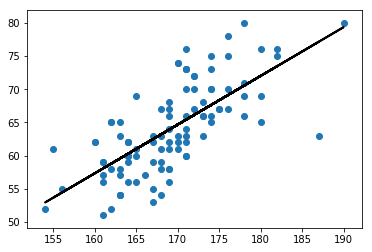

In [31]:
plt.plot(data[['X']], lr.predict(data[['X']]), color='black',linewidth=2)
plt.scatter(data['X'],data['Y'])
plt.show()

Данные подсчеты можно выполнить как вручную (как это сделано выше), используя функции модуля LinearRegression, а можно воспользоваться пакетом функций ols модуля statsmodels. Выполним с помощью данной функции дисперсионный анализ.

# Дисперсионный анализ
Откуда произошло название дисперсионный анализ? Может показаться странным, что процедура сравнения средних называется дисперсионным анализом. В действительности, это связано с тем, что при исследовании статистической значимости различия между средними двух (или нескольких) групп, мы на самом деле сравниваем (анализируем) выборочные дисперсии. 


Метод наименьших квадратов (англ. Ordinary Least Squares, OLS) — математический метод, применяемый для решения различных задач, основанный на минимизации суммы квадратов отклонений некоторых функций от искомых переменных. Выполним метод наименьших квадратов, установив, что Х зависит от Y (Y~X). Заполняем таблицу.

In [32]:
cw_lm=ols('Y~X',data).fit()
sm.stats.anova_lm(cw_lm)

,df,sum_sq,mean_sq,F,PR(>F)
X,1.0,2234.865414,2234.865414,93.020732,7.147254e-16
Residual,98.0,2354.494586,24.025455,NaN,NaN


Используя различные методы оценок, выведем общую информацию.

In [33]:
cw_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     93.02
Date:                Tue, 22 May 2018   Prob (F-statistic):           7.15e-16
Time:                        01:46:34   Log-Likelihood:                -299.84
No. Observations:                 100   AIC:                             603.7
Df Residuals:                      98   BIC:                             608.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -60.1175     12.887     -4.665      0.000     -85.691     -34.545
X              0.7341      0.076      9.645      0.000       0.583       0.885
==============================================================================
Omnibus:                        0.086   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.245
Skew:                           0.039   Prob(JB):                        0.885
Kurtosis:                       2.770   Cond. No.                     4.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Функция summary() позволяет узнать множество показателей дисперсионного анализа. Среди них есть стандартная ошибка, t-статистика, сумма квадратов, средний квадрат и другие.

#### Одним из методов оценки является критерий Дарбина-Уотсона. 
Критерий Дарбина—Уотсона (или DW-критерий) — статистический критерий, используемый для тестирования автокорреляции первого порядка элементов исследуемой последовательности. Наиболее часто применяется при анализе временных рядов и остатков регрессионных моделей. Условный показатель, который применяется для выявления автокорреляции во временных рядах (обозначается d). Показатель d вычисляется по формуле: где yt+1 и yt — соответствующие уровни ряда. При отсутствии автокорреляции в исследуемом ряде показатель D.-W. приближается к числу 2, однако для правильного выбора необходимо учитывать, что в каждом конкретном случае величина d зависит от числа оцениваемых параметров и числа наблюдений. В нашем случае показатель равен 1.799.

В таблице приведены и другие показатели, такие как, например, Тест Харке—Бера (англ. Jarque-Bera test). Это статистический тест, проверяющий ошибки наблюдений на нормальность посредством сверки их третьего момента (асимметрия) и четвёртого момента (эксцесс) с моментами нормального распределения.

Примечание: можно заметить, что в таблице зануляется столбец P> |t|, чтобы узнать показатели, выведем отдельно этот столбец. 

In [34]:
stats.pearsonr(data['X'], data['Y']) 

(0.6978299811232923, 7.147254325453498e-16)

# Выводы

В данной работе показано множество возможностей языка Python для задач математической статистики. 